In [1]:
using FermiCG
using PyCall
using Plots
using LinearAlgebra
using Printf
Threads.nthreads()

12

In [11]:
molecule = "
C         -1.11371       -0.09791       -0.81183
H         -1.86105       -0.15829       -1.36216
C         -0.11556       -1.08792       -0.86572
H         -0.19716       -1.81683       -1.43759
C         -0.97938        0.95193        0.05245
H         -1.65161        1.59326        0.08980
C          1.11371        0.09791        0.81183
H          1.86105        0.15829        1.36216
C          0.11556        1.08792        0.86572
H          0.19716        1.81683        1.43759
C          0.97938       -0.95193       -0.05245
H          1.65161       -1.59326       -0.08980
C         -3.80698       -0.09791        6.37253
H         -4.55433       -0.15829        5.82221
C         -2.80884       -1.08792        6.31865
H         -2.89043       -1.81683        5.74677
C         -3.67266        0.95193        7.23681
H         -4.34488        1.59326        7.27417
C         -1.57956        0.09791        7.99620
H         -0.83222        0.15829        8.54652
C         -2.57771        1.08792        8.05008
H         -2.49611        1.81683        8.62195
C         -1.71389       -0.95193        7.13192
H         -1.04166       -1.59326        7.09456
C         -1.11371        5.34169       -0.81183
H         -1.86105        5.28131       -1.36216
C         -0.11556        4.35168       -0.86572
H         -0.19716        3.62277       -1.43759
C         -0.97938        6.39153        0.05245
H         -1.65161        7.03286        0.08980
C          1.11371        5.53751        0.81183
H          1.86105        5.59789        1.36216
C          0.11556        6.52752        0.86572
H          0.19716        7.25643        1.43759
C          0.97938        4.48767       -0.05245
H          1.65161        3.84634       -0.08980
C         -3.80698        5.34169        6.37253
H         -4.55433        5.28131        5.82221
C         -2.80884        4.35168        6.31865
H         -2.89043        3.62277        5.74677
C         -3.67266        6.39153        7.23681
H         -4.34488        7.03286        7.27417
C         -1.57956        5.53751        7.99620
H         -0.83222        5.59789        8.54652
C         -2.57771        6.52752        8.05008
H         -2.49611        7.25643        8.62195
C         -1.71389        4.48767        7.13192
H         -1.04166        3.84634        7.09456
C          4.40829       -0.09791       -0.81183
H          3.66094       -0.15829       -1.36216
C          5.40644       -1.08792       -0.86572
H          5.32484       -1.81683       -1.43759
C          4.54262        0.95193        0.05245
H          3.87039        1.59326        0.08980
C          6.63571        0.09791        0.81183
H          7.38305        0.15829        1.36216
C          5.63756        1.08792        0.86572
H          5.71916        1.81683        1.43759
C          6.50138       -0.95193       -0.05245
H          7.17361       -1.59326       -0.08980
C          1.71502       -0.09791        6.37253
H          0.96767       -0.15829        5.82221
C          2.71316       -1.08792        6.31865
H          2.63157       -1.81683        5.74677
C          1.84934        0.95193        7.23681
H          1.17712        1.59326        7.27417
C          3.94244        0.09791        7.99620
H          4.68978        0.15829        8.54652
C          2.94429        1.08792        8.05008
H          3.02589        1.81683        8.62195
C          3.80811       -0.95193        7.13192
H          4.48034       -1.59326        7.09456
C          4.40829        5.34169       -0.81183
H          3.66094        5.28131       -1.36216
C          5.40644        4.35168       -0.86572
H          5.32484        3.62277       -1.43759
C          4.54262        6.39153        0.05245
H          3.87039        7.03286        0.08980
C          6.63571        5.53751        0.81183
H          7.38305        5.59789        1.36216
C          5.63756        6.52752        0.86572
H          5.71916        7.25643        1.43759
C          6.50138        4.48767       -0.05245
H          7.17361        3.84634       -0.08980
C          1.71502        5.34169        6.37253
H          0.96767        5.28131        5.82221
C          2.71316        4.35168        6.31865
H          2.63157        3.62277        5.74677
C          1.84934        6.39153        7.23681
H          1.17712        7.03286        7.27417
C          3.94244        5.53751        7.99620
H          4.68978        5.59789        8.54652
C          2.94429        6.52752        8.05008
H          3.02589        7.25643        8.62195
C          3.80811        4.48767        7.13192
H          4.48034        3.84634        7.09456
C         -0.23293        2.62189        4.40402
H          0.51442        2.56151        4.95434
C         -1.23107        1.63188        4.45790
H         -1.14948        0.90297        5.02977
C         -0.36725        3.67173        3.53974
H          0.30498        4.31306        3.50238
C         -2.46035        2.81771        2.78035
H         -3.20769        2.87809        2.23003
C         -1.46220        3.80772        2.72647
H         -1.54380        4.53663        2.15459
C         -2.32602        1.76787        3.64463
H         -2.99825        1.12654        3.68199
C          5.28907        2.62189        4.40402
H          6.03642        2.56151        4.95434
C          4.29093        1.63188        4.45790
H          4.37252        0.90297        5.02977
C          5.15475        3.67173        3.53974
H          5.82698        4.31306        3.50238
C          3.06165        2.81771        2.78035
H          2.31431        2.87809        2.23003
C          4.05980        3.80772        2.72647
H          3.97820        4.53663        2.15459
C          3.19598        1.76787        3.64463
H          2.52375        1.12654        3.68199
"
atoms = []
for (li,line) in enumerate(split(rstrip(lstrip(molecule)), "\n"))
    l = split(line)
    push!(atoms, Atom(li, l[1], parse.(Float64,l[2:4])))
end

cas_norb = 60
cas_nel =60
focc = 240

basis = "sto-3g"
# 
# Create FermiCG.Molecule type
mol     = Molecule(0,1,atoms,basis)

#SCF with relativistic effect
pyscf = pyimport("pyscf")
# pyscf.lib.num_threads(1)


pymol = pyscf.gto.Mole(atom=molecule,
    symmetry = true,spin =0,charge=0,
    basis = basis)


pymol.build()
print("symmetry: ",pymol.topgroup)
# mf = pyscf.scf.UHF(pymol).x2c()
mf = pyscf.scf.RHF(pymol)
mf.verbose = 4
mf.conv_tol = 1e-8
mf.conv_tol_grad = 1e-5
mf.chkfile = "benzene_10mer_rhf.fchk"
# mf.init_guess = "chkfile"
# mf = mf.density_fit()
#mf.with_df.auxbasis = "weigend"
mf.run(max_cycle=200)

@printf(" Hartree-Fock Energy: %12.8f", mf.e_tot)

symmetry: C1

******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-08
SCF conv_tol_grad = 1e-05
SCF max_cycles = 200
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = benzene_10mer_rhf.fchk
max_memory 4000 MB (current use 0 MB)
init E= -2307.25220835036
  HOMO = -0.343912774333459  LUMO = -0.0573008344181343
cycle= 1 E= -2276.92477433911  delta_E= 30.3  |g|= 0.952  |ddm|= 15.1
  HOMO = -0.250568398440584  LUMO = 0.263322634090272
cycle= 2 E= -2277.25009156325  delta_E= -0.325  |g|= 0.276  |ddm|= 1.75
  HOMO = -0.285420468100583  LUMO = 0.240347043701737
cycle= 3 E= -2277.27222424191  delta_E= -0.0221  |g|= 0.121  |ddm|= 0.518
  HOMO = -0.282524337779089  LUMO = 0.246385631910524
cycle= 4 E= -2277.27737840028  delta_E= -0.00515  |g|= 0.007  |ddm|= 0.181
  HOMO = -0.281522963017077  LUMO = 0.247506890621614
cy

In [44]:
using JLD2
C = mf.mo_coeff
frz = [collect(1:120)...] # 1s,2s
doc = [collect(121:160)..., collect(164:171)..., 177, 178, collect(181:190)...]
act = [161, 162, 163, collect(172:176)..., 179, 180, collect(191:240)...]
n_frz = length(frz)
n_doc = length(doc)
n_act = length(act)
println(" Number of frozen   orbitals: ", n_frz)
println(" Number of occupied orbitals: ", n_doc)
println(" Number of active   orbitals: ", n_act)
println(" Total: ", n_frz + n_doc + n_act)
C_frz = C[:,frz]
C_doc = C[:,doc]
C_act = C[:,act]

# Localize active space
pyscflo = pyimport("pyscf.lo")
C_act = pyscflo.PM(pymol).kernel(C_act, verbose=0);


FermiCG.pyscf_write_molden(mol, C, filename="benzene-10mer_rhf.molden")
FermiCG.pyscf_write_molden(mol, C_doc, filename="benzene-10mer_doc.molden")
FermiCG.pyscf_write_molden(mol, C_act, filename="benzene-10mer_act.molden")
@save "benzene_10mer_rhf.jld2" C C_frz C_doc C_act

 Number of frozen   orbitals: 120
 Number of occupied orbitals: 60
 Number of active   orbitals: 60
 Total: 240


In [58]:
# get hcore
# h,j,k = FermiCG.pyscf_get_jk(mol, Pa+Pb);
fock = mf.get_fock()
# hcore = pyscf.scf.hf.get_hcore(pymol)

60×60 Array{Float64,2}:
  5.92797      -0.184052    -0.0336481   …  -0.021977    -0.0489039
 -0.184052      5.45974     -0.180302       -0.0977701   -0.00749044
 -0.0336481    -0.180302     5.84822        -0.185548    -0.0698615
 -0.107676     -0.111943    -0.0369061      -0.0452328   -0.0416368
 -0.111981     -0.0787988   -0.00091199     -0.0416711   -0.045236
 -0.0707752    -0.100225    -0.0996366   …  -0.0640531   -0.0218475
 -0.127169     -0.0581882   -0.0501913      -0.0516689   -0.0363263
 -0.128828     -0.106778    -0.290124       -0.219849    -0.108509
 -0.000145784  -0.0205088   -0.026455       -0.00238967  -0.0145434
 -0.0570874    -0.020875    -0.0229558      -0.0192778   -0.00569726
 -0.119108     -0.0893451   -0.105103    …  -0.0698484   -0.185517
 -0.346051     -0.0430306   -0.119089       -0.0489015   -0.0219183
 -0.0429714    -0.00523071  -0.0894104      -0.00750241  -0.0976852
  ⋮                                      ⋱               
 -0.0637       -0.100312    -0.2229

(60, 60)

-1.0025546659458305e-15
1.6452108094254134
2.5100660778219117
2.7580355755214505
2.763367541578271
2.826205522814375
2.8673969258748744
2.971242347480826
3.0078073235064426
3.0552056048797906
3.1236510103056703
3.2818627935784352
3.2823886557844872
3.3093275243549027
3.4644780461331592
3.5526897357870064
3.583254759768941
3.5897179738472738
3.591522810435877
3.6619682917864047
3.7145201452798284
3.774508510367807
3.8729185659436616
3.92871228777153
4.006150311408571
4.070396978237747
4.12475522125778
4.141487664036521
4.148228359760185
4.162312343717886
4.243539987916615
4.261695602953028
4.2652687444810855
4.336759633424273
4.709261000452804
4.731331832339418
4.953290237115924
5.111359311519323
5.141326307544384
5.1696340802392715
5.20248814253968
5.310857681690058
5.443358023877454
5.571492606637414
5.574265224307584
5.718330382808522
5.724913116045371
5.902137046263881
5.908317356266728
5.948031164913666
6.066452141837963
6.148219648741847
6.1972194370608005
6.277573250819108
6.2781

# Now cluster the active space

(60, 60)

10-element Array{Cluster,1}:
 Cluster(1, [1, 2, 3, 4, 5, 6])
 Cluster(2, [7, 8, 9, 10, 11, 12])
 Cluster(3, [13, 14, 15, 16, 17, 18])
 Cluster(4, [19, 20, 21, 22, 23, 24])
 Cluster(5, [25, 26, 27, 28, 29, 30])
 Cluster(6, [31, 32, 33, 34, 35, 36])
 Cluster(7, [37, 38, 39, 40, 41, 42])
 Cluster(8, [43, 44, 45, 46, 47, 48])
 Cluster(9, [49, 50, 51, 52, 53, 54])
 Cluster(10, [55, 56, 57, 58, 59, 60])

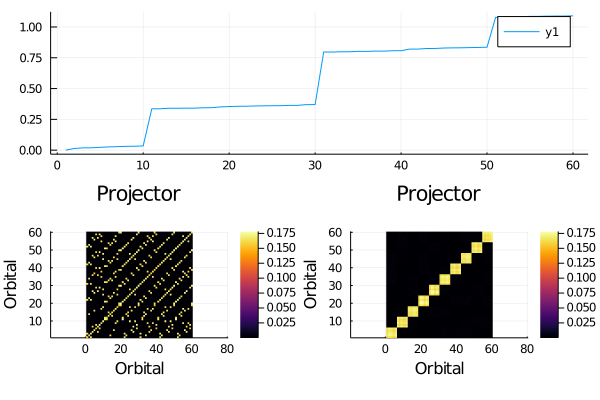

In [88]:
using Clustering
using SpectralClustering
using Random
Random.seed!(2)

operator = C_act' * fock * C_act
A = abs.(operator)
L = Diagonal([sum(A[i,:]) for i in 1:size(A,1)]) - A;
F = eigen(L);
# display(L)

display(size(h_act))
# p1 = heatmap(abs.(A), aspect_ratio=:equal, xlabel="Orbital", ylabel= "Orbital", title="HCore")
# plot(p1)
# savefig("clustering.pdf")

# for i in F.values
#     println(i)
# end
p1 = plot(F.values)

n_clusters = 10

nvecs = n_clusters
A = abs.(F.vectors[:,1:nvecs]*F.vectors[:,1:nvecs]')
p2 = heatmap(abs.(A), aspect_ratio=:equal, xlabel="Orbital", ylabel= "Orbital", title="proj")


clustering = clusterize(KMeansClusterizer(nvecs), A).assignments;
perm = sortperm(clustering)
p2 = heatmap(A, aspect_ratio=:equal, xlabel="Orbital", ylabel= "Orbital", title="Projector")
# p2 = heatmap(A_act, aspect_ratio=:equal, xlabel="Orbital", ylabel= "Orbital", title="Projector", size = (500,500), dpi=300)
A = A[perm, perm]
p3 = heatmap(A, aspect_ratio=:equal, xlabel="Orbital", ylabel= "Orbital", title="Projector")
# p3 = heatmap(A_act, aspect_ratio=:equal, xlabel="Orbital", ylabel= "Orbital", title="Projector", size = (500,500), dpi=300)

C_act = C_act[:,perm]
clustering = clustering[perm]

# p4 = heatmap(A, aspect_ratio=:equal, xlabel="Orbital", ylabel= "Orbital", title="F")
# p5 = heatmap(A[perm, perm], aspect_ratio=:equal, xlabel="Orbital", ylabel= "Orbital", title="F")


FermiCG.pyscf_write_molden(mol, C_act, filename="benzene_10mer_act_sorted.molden");


clusters = [ [] for i in 1:n_clusters]
for (idx,i) in enumerate(clustering)
    push!(clusters[i],idx)
end
# define clusters
clusters = [Cluster(i,collect(clusters[i])) for i = 1:length(clusters)]
init_fspace = [ (3,3) for i in 1:n_clusters]
display(clusters)


plot(p1, p2, p3, layout = @layout [a ; b c])
# savefig("clustering.pdf")



In [89]:
#
# Build Integrals
ints = FermiCG.pyscf_build_ints(mol, C_act, 2*(C_doc*C_doc' + C_frz*C_frz'));
@printf(" Ecore: %12.8f", ints.h0)


 Ecore: -2081.44571519

In [108]:
# HF Density Matrix in the active space
Pao_a = tr(C_act' * mf.get_ovlp() *mf.mo_coeff[:,1:210]*mf.mo_coeff[:,1:210]'* mf.get_ovlp() * C_act)


29.999999999999996

# Optimize CMF orbitals

In [109]:

rdm1 = Pao_a.*2.0

e_cmf, U, Da, Db  = FermiCG.cmf_oo(ints, clusters, init_fspace, rdm1,
                                        max_iter_oo=50, verbose=0, gconv=1e-6, method="bfgs");


 ooCMF Iter:    1 Total= -2278.100662283527 Active= -196.654947094099 G=     6.67e-02
 ooCMF Iter:    2 Total= -2278.101698591905 Active= -196.655983402477 G=     1.96e-02
 ooCMF Iter:    3 Total= -2278.101878911530 Active= -196.656163722103 G=     2.27e-02
 ooCMF Iter:    4 Total= -2278.102440589675 Active= -196.656725400247 G=     3.66e-02
 ooCMF Iter:    5 Total= -2278.102885368852 Active= -196.657170179425 G=     9.67e-03
 ooCMF Iter:    6 Total= -2278.102913530821 Active= -196.657198341394 G=     7.78e-03
 ooCMF Iter:    7 Total= -2278.102968632498 Active= -196.657253443071 G=     8.96e-03
 ooCMF Iter:    8 Total= -2278.102989162956 Active= -196.657273973529 G=     2.93e-03
 ooCMF Iter:    9 Total= -2278.102991445559 Active= -196.657276256132 G=     1.94e-03
 ooCMF Iter:   10 Total= -2278.102994234016 Active= -196.657279044589 G=     2.88e-03
 ooCMF Iter:   11 Total= -2278.102998671136 Active= -196.657283481709 G=     2.12e-03
 ooCMF Iter:   12 Total= -2278.102999924594 Active= -1

 * Status: success

 * Candidate solution
    Final objective value:     -2.278103e+03

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 1.50e-06 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.30e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 8.09e-11 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 3.55e-14 ≰ 0.0e+00
    |g(x)|                 = 7.73e-07 ≤ 1.0e-06

 * Work counters
    Seconds run:   532  (vs limit Inf)
    Iterations:    31
    f(x) calls:    74
    ∇f(x) calls:   74


 ooCMF Iter:   32 Total= -2278.103006582778 Active= -196.657291393351 G=     1.04e-05
*ooCMF -2278.10300658 


In [110]:
# Save molden file and rotate integrals
C_cmf = C_act * U
FermiCG.pyscf_write_molden(mol,C_cmf,filename="benzene_10mer_cmf.molden");
ints = FermiCG.orbital_rotation(ints,U);

In [111]:
@save "benzene_10mer.jld2" C C_frz C_doc C_act C_cmf fock ints Da Db clusters init_fspace

# Compute `cluster_bases` and `cluster_ops`

In [112]:

max_roots = 100

#
# Build Cluster basis
cluster_bases = FermiCG.compute_cluster_eigenbasis(ints, clusters, verbose=0, max_roots=max_roots,
        init_fspace=init_fspace, rdm1a=Da, rdm1b=Db);

In [113]:
#
# Build ClusteredOperator
clustered_ham = FermiCG.extract_ClusteredTerms(ints, clusters);


 Remove duplicates
 Number of terms reduced from 40150 to 16210


In [114]:
# Build Cluster Operators
cluster_ops = FermiCG.compute_cluster_ops(cluster_bases, ints);

In [115]:
# Add cmf hamiltonians for doing MP-style PT2 
FermiCG.add_cmf_operators!(cluster_ops, cluster_bases, ints, Da, Db, verbose=0);

# Do TPSCI 

In [116]:
nroots = 1
ci_vector = FermiCG.ClusteredState(clusters, FermiCG.FockConfig(init_fspace), R=nroots);
display(ci_vector)


 --------------------------------------------------
 ---------- Fockspaces in state ------: Dim =     1  
 ----------                root ------:     =     1  
 --------------------------------------------------
 Printing contributions greater than: 0.001000
 Weight              # Configs           Fock space(α,β)...  
 -------             ---------           ----------          
 --------------------------------------------------


In [ ]:
e0, v0 = FermiCG.tpsci_ci(ci_vector, cluster_ops, clustered_ham,
                            thresh_cipsi=.5e-3, # Threshold for adding to P-space
                            thresh_foi=1e-5,    # Threshold for keeping terms when defining FOIS    
                            thresh_asci=-1,     # Threshold of P-space configs to search from
                            max_iter=10,
                            matvec=3);


 ci_vector     :(1, 1)
 thresh_cipsi  :0.0005
 thresh_foi    :1.0e-5
 thresh_asci   :-1
 max_iter      :10
 conv_thresh   :0.0001

     Selected CI Iteration:    1 epsilon:   0.00050000
 Build Hamiltonian matrix with dimension:     1
  0.336256 seconds (673.28 k allocations: 34.286 MiB)
  Root       Energy           S2
     1 -196.65729139   0.00000000
 --------------------------------------------------
 ---------- Fockspaces in state ------: Dim =     1  
 ----------                root ------:     =     1  
 --------------------------------------------------
 Printing contributions greater than: 0.001000
 Weight              # Configs           Fock space(α,β)...  
 -------             ---------           ----------          
 1.000               1                   ( 3,3 )( 3,3 )( 3,3 )( 3,3 )( 3,3 )( 3,3 )( 3,3 )( 3,3 )( 3,3 )( 3,3 )
 --------------------------------------------------
 Length of ASCI vector        1 →        1 
 Norm of delta v:
   1.00000000
 In open_matvec_thread